# Cats and Dogs

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images' #untar_data returns a Path object
                                        #Which contains the path to the extracted files
                                        #URLs.PETS is fast.ai's hard-coded dataset for
                                        #https://www.robots.ox.ac.uk/~vgg/data/pets/

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/opt/conda/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 74.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.164669,0.026006,0.009472,20:57


epoch,train_loss,valid_loss,error_rate,time
0,0.063909,0.022669,0.008119,26:17


In [4]:
#Add your own cat/dog image.
!pip install ipywidgets --upgrade --quiet    #Got the imports necessary from... https://forums.fast.ai/t/widgets-fileupload-not-working/77118/2
from ipywidgets import *

uploader = widgets.FileUpload()
uploader #prints the button for you to upload the cat/dog img.

FileUpload(value={}, description='Upload')

Is this a cat?; True.
Probability it's a cat: 1.000000


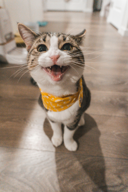

In [5]:
#Now let's use the image.
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?; {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
#:.6f is the formatting specifier. ":" means start of format specs.
# "." is a separator. My understanding is it must be for before and after decimals
# "6" is how many digits to the right (because we're in the decimals side)
# "f" means the number's format will be float.

#Here, use this to look at the guy you added!
img.to_thumb(192)

# What Machine Learning is...
Some powerful ideas
-> Weights
-> every weight assignment (that is, updating the weights, changing them a bit each time), has a "performance" (how good were the results those weights produced?)
-> the weights performance must be tested automatically
-> We improve performance by improving the weights.

That's what Gradient Descent provides!

So now we're working not with programs, but with "models", as they're called.
a MODEL depends on WEIGHTS.
Nowadays the WEIGHTS are called PARAMETERS. Whereas "weights" is a specific type of model parameter.

The automatic way of testing it is to test slightly different models. You see which one is better, and which way the weights were moved to make it better. So you say: "Ah, let's move them a bit further in said direction, see if it goes better".

If that can be done automatically, then the machine is "learning" from experience.

In [6]:
#Install the graphing utility to see something really cool.
!pip install graphviz --quiet
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')
#From: https://github.com/fastai/fastbook/blob/b7f756b49d4eb0d3ce96c0c29be98f4f293cde9f/utils.py#L22

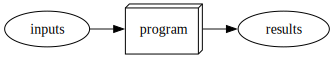

In [7]:
## PROGRAM Perspective
# The classic input some data, get some result through the program's use of said data.

#hide_input
#caption A traditional program
#id basic_program
#alt Pipeline inputs, program, results
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

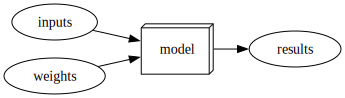

In [8]:
## MODEL Perspective (Basic)
# With a modell instead of a program. Weights affect the model

#hide_input
#caption A program using weight assignment
#id weight_assignment
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

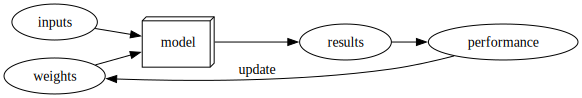

In [9]:
## MODEL Perspective (training)
# Now you can see the performance affects the weights. This loop goes on for "x" iterations.

#hide_input
#caption Training a machine learning model
#id training_loop
#alt The basic training loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

# Machine Learning
The computer learns from experience, not through manual coding.

# Mathematical proof
Universal Approximation Theorem shows the Neural Net's function "can solve any problem to any level of accuracy in theory. It's flexible depending on its weights".

## Note
Something I always wondered about, now that the book talks of checkers...
Programs inherently learn rules, and there's some hand-engineering done to models sometimes,
especially if you don't have too much data.
When you DO have a lot of data, you can apply E2E Learning: Just learn the computer learn everything by itself.

# ML LIMITATIONS

1) A model can't be created without data

2) A model can only operate on the patterns seen in the input data used to train it (so, would you say architecture imprints a manner of thought into the model?)

3) This learning approach creates "predictions", not recommended actions. (So an inference. I've been thinking perhaps all humans are working under inferences based on their own experiences. Seems like people in the industrial era saw everything as cogs in a machine, and people in the era before saw everything under the frame of their most recent tech, and so on...)

4) We need both INPUT DATA and the LABELS for that data.

5) FEEDBACK LOOPS: Past biased data may result in people taking actions that reinforce the data, and feeding that data caused by action furthers the bias.

# Classification vs. Regression

Classification Model: attempts to predict a Class, or Category

Regression Model: attempts to predict 1+ numeric quantities, such as temperature or location.
Sometimes people use "regression" to refer to a "Linear Regression Model", but that's bad practice.

# Overfitting
The single most important problem you'll fight most of the time probably. It's making your model rely too much on the data points presented, and not generalize.

# Layers and their importance.
Models using architectures with more layers take longer to train, and are more prone to overfitting.
You can't train them for as many epochs before the accuracy on the validation set starts getting worse.
UNLESS, when using more data, they're more accurate

# Metric
A FUNCTION that ensures the quality of predictions. Remember, only the VALIDATION SET is used for showing you accuracy.
I've seen it on TF many times, often set to metrics=["accuracy"]

Here it's set to "error_rate"
error_rate: tells you what percentage of images are being classified incorrectly, in the VALIDATION SET.

Oh, and here's "accuracy":
accuracy: 1.0 - error_rate

# LOSS VS METRIC
Loss - A measure of PERFORMANCE. Used by the training system to update weights automatically.
A good choice for loss is a choice that is easy for SGD to use.

Metric - Defined for human consumption. Must be easy for you to understand, and it must 


# Object Recognition - Camvid Dataset
This is actually Image Segmentation. The book uses a subset of the "Camvid" Dataset.


In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

In [ ]:
# See results
learn.show_results(max_n=6, figsize=(7,8))

# Natural Language Processing (NLP)
Code to train a model that can classify the sentiment of a movie review.

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=16)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

## Cleaning your memory
"CUDA out of memory error" ? Then restart the kernel, and run it with bs=32. That means Batch Size will be reduced to 32. If it's still too much, reduce it to 16.

In [ ]:
#Results
learn.predict("I really liked that movie!")

## Learning about fastai methods
Just hit a block hit this function, passing the method name

In [ ]:
doc(learn.predict)

# Neural Nets applied to Tabular Data
It works pretty well in structured data.

In [ ]:
# This is the Adult dataset http://robotics.stanford.edu/~ronnyk/nbtree.pdf
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

# Categorical vs. Continuous columns
the Categorical ones correspond to those that contain only labels.
the Continuous ones are the ones that contain quantities.

In [ ]:
#Now we're not using fine_tune. It's not as common in structured data.
learn.fit_one_cycle(3)

In [ ]:
# Netflix predict movies people will like: MovieLens Dataset
# https://dl.acm.org/doi/10.1145/2827872
# doc(CollabDataLoaders) #This line won't work

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

## QUESTIONNAIRE

### 1. Do you need these for deep learning?

   - Lots of math T / F         --False
   - Lots of data T / F         --False
   - Lots of expensive computers T / F    --False
   - A PhD T / F                --False (Although I would argue a Master's is still helpful
   
### 2. Name five areas where deep learning is now the best in the world.
    --Computer Vision: Satellite and drone image interpretation. Face Recognition, Image Captioning, Read traffic signs, locate pedestrians and vehicles in autonomous vehicles.
    --Medicine: Finding anomalies in radiology images, CT, MRI, X-ray images. Count features in pathology slides. Measuring features in ultrasounds, diagnosing diabetic retinopathy
    --Biology: Folding proteins, classifying proteins, genomic tasks such as tumor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions.
    --Recommendation systems: web search, product recommendation, home page layout.
    --NLP: Answering questions, speech recognition, summarizing documents, classifying documents; finding names,
    dates in documents; searching for articles mentioning a concept
### 3. What was the name of the first device that was based on the principle of the artificial neuron?
    -- Mark I Perceptron. An artificial neuron. It was capable of perceiving, recognizing, and identifying its surroundings without any human training or control. It was able to successfully recognize shapes.
    
    
### 4. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?
    --A set of Processing Units (which are also called "units" in a Neural Net)
    --A state of activation (either this refers to the 0/1 output or to the activation function in each unit)
    --An output function for each unit (each unit has an activation function)
    --A pattern of connectivity among units (I guess this refers to the fact NNs are Fully Connected)
    --A propagation rule for propagating patterns of activities through the network of connectivities (this might refer to the forward pass, as it could also be called "propagate()")
    --An Activation Rule for combining the inputs impinging (having an effect, especially a negative one) on a unit with the current state of that unit to produce an OUTPUT for the unit. (The Softmax/BinaryClassification output?)
    --A LEARNING RULE whereby patterns of connectivity are modified by experience (Weights or Parameters)
    --An ENVIRONMENT within which the system must operate (The Train/Dev/Test sets?)

### 5. What were the two theoretical misunderstandings that held back the field of neural networks?
    --First, ignoring that more than one layer would solve the limitations of single-layer neural networks. A single-layer net was able to learn "simple but critical math functions such as XOR".
    --Second, the first nets to have two layers were too big and too slow to be useful. With more data, improvements in hardware, and algorithmic tweaks, it was surpassed.
    
### 6. What is a GPU?
    --Graphical processing unit. Specialized for handling thousands of single tasks at the same time. While originally for games' graphics, NNs also use these parallel simple tasks to run faster than just a CPU.

### 7. Open a notebook and execute a cell containing: `1+1`. What happens?
    --It prints "2"
### 8. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.

### 9. Complete the Jupyter Notebook online appendix.
    --"Is it a bird?"? That notebook? I've already gone through it, although quite quickly.
### 10. Why is it hard to use a traditional computer program to recognize images in a photo?
    --Making out the steps for how to recognize something in a photo is really hard to do.
    --A model is made to learn and generalize in a way a program quite can't by just following rules. And specifying those rules by hand is quite difficult. It's better to let the model make the computer figure out the rules itself.

### 11. What did Samuel mean by "weight assignment"?
    --A weight is a value chosen for the model to steer in one direction or another when receiving some input. A weight assignment choosing a value that steers it in a direction that lets it get better results.
    
### 12. What term do we normally use in deep learning for what Samuel called "weights"?
    --they're called "parameters"
    
### 13. Draw a picture that summarizes Samuel's view of a machine learning model.
    
    inputs---->Model-->Output-->Performance
    weights-|                        |
        |----<--update-<--------------
### 14. Why is it hard to understand why a deep learning model makes a particular prediction?
    --Because it's just a series of weights and each neuron or unit is learning to activate on the presence of something it considers relevant to a choice it's specialized in. It's not impossible to know, as seen in CNNs, but it's still a challenge. There are many units, many layers.
### 15. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
    -- The "Universal Approximation Theorem" shows the function of a neural network (because a Neural Network is a mathematical function) can solve any problem, to any level of accuracy, in theory.
    --They're so flexible and suitable you can focus your effort on training them: finding good weight assignments.
### 16. What do you need in order to train a model?
    --Data. Enough of it.
    
### 17. How could a feedback loop impact the rollout of a predictive policing model?
    --It makes you take choices that will reinforce the initial results. I like apples so the model recommends apples so I eat more apples so the model will again recommend apples because I only eat apples.
### 18. Do we always have to use 224×224-pixel images with the cat recognition model?
    --It's a standard for old pretrained models. But you can increase it: you'll get better results at the cost of speed and memory consumption.
    
### 19. What is the difference between classification and regression?
    --Classification: The model predicts which category an example fits into.
    --Regression: The model predicts one or more numeric quantities.
### 20. What is a validation set? What is a test set? Why do we need them?
    --Validation set is a group of examples separate of your training set. You evaluate the resulting model on it, to see how it performs. As you're going to try to treat high bias (underfitting) and high variance (overfitting) on it, You're sort of working towards this goal.
    --The test set is completely separate and unknown. Thus, you can't optimize towards it. Whenever you get to it, the results are as real-life as you can get (or at least they're supposed to be).
### 21. What will fastai do if you don't provide a validation set?
    --It automatically takes 20% of your dataset.
### 22. Can we always use a random sample for a validation set? Why or why not?
    --No, because it might not make sense. For example, in a time-series data where you want to predict where the series is going, you want the data to be ordered correctly.
    
### 23. What is overfitting? Provide an example.
    --Overfitting is to fit the model too tightly to the data you have presented. More than learning a function that generalizes well to further, unseen examples, it's just a function that can perfectly answer only the set you've provided. 
    -- The example provided is trying to make a model (unknowingly) memorize the function x^2.
    --Overfitting, the model dashes straight from one example to another, going up and down.
    --Generalizing, it just tries to approach the points as best as it can.
### 24. What is a metric? How does it differ from "loss"?
    --A function that measures the quality of the model's predictions using the validation set.
    --A common metric is "error_rate, which tells how many images in the Validation/Dev set were classified incorrectly. Another common one is "accuracy": 1.0 - error_rate.
### 25. How can pretrained models help?
    --They're already very capable, with weights that have lead to good results somewhere. The low-level feature recognition can transfer over to similar tasks. Thus, these nets that are good at generalizing are fine tuned on the later layers (the last one and maybe a few before), so that higher-level features are learned according to your dataset.
### 26. What is the "head" of a model?
    --The very last layer, responsible for classifying an example into one of the available classes.
    --It's replaced on pretrained models. So here it's defined as "the part that is newly added to be specific to the new dataset".
### 27. What kinds of features do the early layers of a CNN find? How about the later layers?
    --diagnoal, horizontal, vertical edges; gradients. Simple building blocks.
    --Then feature detectors for corners, repeating lines, circles: simple patterns.
    --Layer 3 learns higher-level semantic components: car wheels, text, flower petals
    --Layer 4 and 5 go higher-level concepts
    
    --So you go from low-level concepts to high-level concepts.
    
### 28. Are image models only useful for photos?
    --Nope. Here we see it applied to spectrograms in order to use pattern recognition in them to classify them into what sound it is.
    --We also have an example of malware being turned into images, because the transformation allows even the human eye to distinguish them through this.
    --Another example is mouse movement into images to detect bots.

### 29. What is an "architecture"?
    --The math function we pass input data into, as well as passing parameters.
    --In my opinion, it's the arrangement of the layers and the choice of functions.
### 30. What is segmentation?
    --Recognizing the content of every individual pixel in an image.
### 31. What is `y_range` used for? When do we need it?
    --Specifies the range of values a continuous parameter has.
### 32. What are "hyperparameters"?
    --Parameters for configuring a model and its parameters. Choices regarding network architecture, learning rates, data augmentation strategies, and so on. Like Momentum and RMSProp have more hyperparams (beta), and there's weight decay, and some epsilons used for not dividing over 0 in the case of Adam (Momentum+RMSProp), and more.
### 33. What's the best way to avoid failures when using AI in an organization?
    --Understand Test and Validation Sets and why they're important. Create your own test set, and use that to check a model's performance.

In [ ]:
We just covered a lot of information so let's recap briefly, <<dljargon>> provides a handy vocabulary.

```asciidoc
[[dljargon]]
.Deep learning vocabulary
[options="header"]
|=====
| Term | Meaning
|Label | The data that we're trying to predict, such as "dog" or "cat"
|Architecture | The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to
|Model | The combination of the architecture with a particular set of parameters
|Parameters | The values in the model that change what task it can do, and are updated through model training
|Fit | Update the parameters of the model such that the predictions of the model using the input data match the target labels
|Train | A synonym for _fit_
|Pretrained model | A model that has already been trained, generally using a large dataset, and will be fine-tuned
|Fine-tune | Update a pretrained model for a different task
|Epoch | One complete pass through the input data
|Loss | A measure of how good the model is, chosen to drive training via SGD
|Metric | A measurement of how good the model is, using the validation set, chosen for human consumption
|Validation set | A set of data held out from training, used only for measuring how good the model is
|Training set | The data used for fitting the model; does not include any data from the validation set
|Overfitting | Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training
|CNN | Convolutional neural network; a type of neural network that works particularly well for computer vision tasks
|=====
```

# Further Research
The questions at the very end! 

1) Why is a GPU useful for Deep Learning? How is a CPU different, and why is it less effective for Deep Learning?
To provide an answer founded on my understanding, I'd say that GPUS are specialized in simple tasks that are executed in parallel. As you have to process a lot of examples in a Deep Learning Model, and that would take a long time per example, you instead let the GPU do this in parallel.
As to the specifics of it, I'm not sure if there's a coordinating process for mini-batches, because you need to get the Loss at the end for the mini-batch. There's also the iterations, which means re-doing this again and again.

Here's from an [article][1] by Joan Li. In essence, GPU is good at processing data in parallel, while CPU is better for sequential processes. Dsouza provides more detail in this [article][2]: both processign inputs through layers, and the weight adjustment operations are Matrix Multiplications. When Neural Nets have 100,000 params, a CPU can manage in minutes or hours, but 10 billion params would never be done. He provides an quote of a net with 100 million outputs, 2000 params per product, amounting to 200 billion parameters.

Thus, Dsouza introduces the idea of using a GPU so that all operations are done in parallel, explaining that the GPU usually performs floating point operations for rendering graphics, allowing CPU cycles to do other things. GPUs, he elaborates, have many logical cores (ALUs, control units, and memory cache), allowing for better computation of multiple parallel processes, but these will be simpler calculations. On the other hand, CPUs are better for single, sequential, but more complex calculations.

2) Try to think of 3 areas where feedback loops might impact the use of Machine Learning. See if you can find documented examples of that happening in practice.
If the feedback loop involves the user, as the example of crimes does, then I'd say working with ChatGPT is a way in which you can get trapped in a Feedback Loop.
a) Suppose you're using ChatGPT to get help on the implementation of a function, because you don't know what the best approach is. ChatGPT and you, together, can get stuck on trying one of the solutions it presents, which may be impractical, niche, ugly, or overall a bad practice, say, using Named Pipes. You'll need to start another conversation from the beginning in order to get a different response, or to nudge it in the right direction.

Now let's look for documented examples.
Deepchecks provides [this][3] article (which is also [this][4] article), in which they provide two examples. The first one is social media recommendation systems. These are used to make users spend more time on the platform, yet it could cause negative feedback loops like, for example, if the user has seen content that spreads harmful ideology, they will be presented more of that. It narrows down the content that the user is presented.

I would suppose that maybe DL models that are focused on diagnostics could run into the same problem as crime does, in which people could be diagnosed often as one thing or another, having a bias in what it diagnoses. It could prefer some treatments over others.

If you made a model predicting routes for getting from one place to another, efficient or not, and people start taking that route, then it might change the route, supposing it keeps using the data as training. Or it could reinforce the common routes for getting somewhere

[Hagiu and Wright][5] mention that ChatGPT has feedback loops: one of them is the user review of the conversation (thumbs-up or thumbs-down), and another is the questions that the user makes after the model's answers, which they state might be a difficult inference to do.

[1]: https://www.linkedin.com/pulse/gpu-vs-cpu-which-one-do-you-need-want-learn-deep-learning-geonadir/
[2]: https://towardsdatascience.com/what-is-a-gpu-and-do-you-need-one-in-deep-learning-718b9597aa0d
[3]: https://deepchecks.com/glossary/feedback-loop/
[4]: https://medium.com/unpackai/feedback-loops-friend-or-foe-81a552203228
[5]: https://hbr.org/2023/07/to-get-better-customer-data-build-feedback-loops-into-your-products